In [1]:
import osmnx as ox


import pandas as pd

import geopandas as gpd

import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
address = '90031'

In [3]:
%%time

van = ox.geometries_from_address(address,tags={'building':True},dist=1000)

CPU times: user 847 ms, sys: 67 ms, total: 914 ms
Wall time: 5.27 s


In [4]:
van.shape

(3174, 39)

In [5]:
type(van)

geopandas.geodataframe.GeoDataFrame

In [6]:
van.sample(10)

geometry  \
element_type osmid                                                          
way          147540554  POLYGON ((17.02447 48.26807, 17.02453 48.26816...   
             147540332  POLYGON ((17.02977 48.26851, 17.02981 48.26850...   
             147541255  POLYGON ((17.02912 48.28084, 17.02913 48.28081...   
             640659054  POLYGON ((17.02170 48.27921, 17.02169 48.27918...   
             147540234  POLYGON ((17.03774 48.27259, 17.03773 48.27261...   
             147542426  POLYGON ((17.03642 48.27630, 17.03645 48.27640...   
             147541140  POLYGON ((17.03545 48.27744, 17.03551 48.27745...   
             147540347  POLYGON ((17.02973 48.27440, 17.02970 48.27440...   
             147538001  POLYGON ((17.03412 48.27236, 17.03411 48.27234...   
             918843626  POLYGON ((17.03187 48.27874, 17.03179 48.27888...   

                       addr:conscriptionnumber addr:housenumber addr:street  \
element_type osmid                                                            
way          147540554                     NaN              NaN         NaN   
             147540332                     NaN              NaN         NaN   
             147541255                     NaN              NaN         NaN   
             640659054                     NaN              NaN         NaN   
             147540234                     NaN              NaN         NaN   
             147542426                     NaN              NaN         NaN   
             147541140                     NaN              NaN         NaN   
             147540347                     NaN              NaN         NaN   
             147538001                     NaN              NaN         NaN   
             918843626                     NaN              NaN         NaN   

                       addr:streetnumber amenity operator historic  \
element_type osmid                                                   
way          147540554               NaN     NaN      NaN      NaN   
             147540332               NaN     NaN      NaN      NaN   
             147541255               NaN     NaN      NaN      NaN   
             640659054               NaN     NaN      NaN      NaN   
             147540234               NaN     NaN      NaN      NaN   
             147542426               NaN     NaN      NaN      NaN   
             147541140               NaN     NaN      NaN      NaN   
             147540347               NaN     NaN      NaN      NaN   
             147538001               NaN     NaN      NaN      NaN   
             918843626               NaN     NaN      NaN      NaN   

                                                                    nodes  \
element_type osmid                                                          
way          147540554  [1607465946, 1607466035, 1607465987, 160746590...   
             147540332  [1607466464, 1607466454, 1607466379, 160746638...   
             147541255  [1607500100, 1607500081, 1607499980, 160749997...   
             640659054  [6035184543, 6035184532, 6035184534, 603518452...   
             147540234  [1607478353, 1607478424, 1607478555, 160747814...   
             147542426  [1607490029, 1607490082, 1607490081, 160749007...   
             147541140  [1607491831, 1607491848, 1607491709, 160749169...   
             147540347  [1607487262, 1607487271, 1607487412, 160748733...   
             147538001  [1607476842, 1607476665, 1607476709, 160747738...   
             918843626  [8533389695, 8533389696, 8533389697, 853338969...   

                       building  ... leisure castle_type brand brand:wikidata  \
element_type osmid               ...                                            
way          147540554      yes  ...     NaN         NaN   NaN            NaN   
             147540332   garage  ...     NaN         NaN   NaN            NaN   
             147541255      yes  ...     NaN         NaN   NaN            NaN   
             6406590

In [7]:
list(van)

['geometry',
 'addr:conscriptionnumber',
 'addr:housenumber',
 'addr:street',
 'addr:streetnumber',
 'amenity',
 'operator',
 'historic',
 'nodes',
 'building',
 'building:levels',
 'source',
 'import',
 'building:material',
 'addr:city',
 'addr:country',
 'addr:postcode',
 'addr:suburb',
 'ref:minvskaddress',
 'source:addr',
 'roof:levels',
 'name',
 'roof:shape',
 'denomination',
 'religion',
 'url',
 'fixme',
 'phone',
 'website',
 'leisure',
 'castle_type',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'check_date:opening_hours',
 'email',
 'opening_hours',
 'shop',
 'coffee']

In [8]:
van.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 3174 entries, ('way', 23335448) to ('way', 1022974842)
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   geometry                  3174 non-null   geometry
 1   addr:conscriptionnumber   161 non-null    object  
 2   addr:housenumber          206 non-null    object  
 3   addr:street               203 non-null    object  
 4   addr:streetnumber         176 non-null    object  
 5   amenity                   10 non-null     object  
 6   operator                  1 non-null      object  
 7   historic                  2 non-null      object  
 8   nodes                     3174 non-null   object  
 9   building                  3174 non-null   object  
 10  building:levels           50 non-null     object  
 11  source                    3009 non-null   object  
 12  import                    35 non-null     object  
 13  building:

In [9]:
columns_to_keep = ['geometry','building', 'addr:housenumber', 'addr:street', 'nodes']
van = van[columns_to_keep]
van.sample(10)

geometry  \
element_type osmid                                                          
way          147542360  POLYGON ((17.02991 48.27474, 17.02991 48.27470...   
             147541125  POLYGON ((17.02910 48.27854, 17.02916 48.27850...   
             147540885  POLYGON ((17.03334 48.27724, 17.03338 48.27711...   
             147542348  POLYGON ((17.03000 48.27249, 17.02991 48.27250...   
             147539429  POLYGON ((17.03827 48.27829, 17.03821 48.27825...   
             147543197  POLYGON ((17.03196 48.27112, 17.03187 48.27114...   
             147540914  POLYGON ((17.02998 48.27471, 17.02993 48.27471...   
             73673557   POLYGON ((17.02177 48.26843, 17.02174 48.26836...   
             147539038  POLYGON ((17.03754 48.27785, 17.03749 48.27783...   
             243794035  POLYGON ((17.04330 48.28060, 17.04331 48.28058...   

                       building addr:housenumber addr:street  \
element_type osmid                                             
way          147542360      yes              NaN         NaN   
             147541125      yes              NaN         NaN   
             147540885      yes              NaN         NaN   
             147542348      yes              NaN         NaN   
             147539429      yes               89        Nová   
             147543197      yes              NaN         NaN   
             147540914      yes              NaN         NaN   
             73673557       yes              NaN         NaN   
             147539038      yes              NaN         NaN   
             243794035      yes              NaN         NaN   

                                                                    nodes  
element_type osmid                                                         
way          147542360  [1607488403, 1607488346, 1607488345, 160748835...  
             147541125  [1607493836, 1607493796, 1607493589, 160749364...  
             147540885  [1607491510, 1607491271, 1607491256, 160749149...  
             147542348  [1607477892, 1607477924, 1607478133, 160747810...  
             147539429  [1607493472, 1607493402, 1607493467, 160749349...  
             147543197  [1607472048, 1607472112, 1607472122, 160747251...  
             147540914  [1607488355, 1607488361, 1607488412, 160748839...  
             73673557   [872653927, 872653931, 872653933, 872653936, 8...  
             147539038  [1607492658, 1607492633, 1607492702, 160749274...  
             243794035  [2511553294, 2511553281, 2511553282, 251155327...

In [10]:
van.head()

geometry  \
element_type osmid                                                         
way          23335448  POLYGON ((17.04688 48.27892, 17.04703 48.27893...   
             73673478  POLYGON ((17.02031 48.26814, 17.02032 48.26817...   
             73673479  POLYGON ((17.02036 48.26828, 17.02037 48.26834...   
             73673482  POLYGON ((17.02047 48.26823, 17.02057 48.26822...   
             73673484  POLYGON ((17.02043 48.26872, 17.02050 48.26871...   

                      building addr:housenumber addr:street  \
element_type osmid                                            
way          23335448      yes              NaN         NaN   
             73673478      yes              NaN         NaN   
             73673479      yes              NaN         NaN   
             73673482      yes              NaN         NaN   
             73673484      yes              NaN         NaN   

                                                                   nodes  
element_type osmid                                                        
way          23335448  [252684430, 252684431, 9083095470, 9083095471,...  
             73673478  [872653262, 872653265, 872653269, 872653273, 8...  
             73673479  [872653320, 872653322, 872653324, 872653328, 8...  
             73673482  [872653348, 872653351, 872653354, 872653360, 8...  
             73673484  [872653374, 872653376, 872653380, 872653384, 8...

In [11]:
van_building_counts = van.building.value_counts()
van_building_counts

yes                   2946
house                   72
garage                  55
detached                43
apartments              23
terrace                 12
semidetached_house       6
school                   5
chapel                   3
ruins                    2
industrial               2
retail                   2
church                   1
warehouse                1
service                  1
Name: building, dtype: int64

In [12]:
type(van_building_counts)

pandas.core.series.Series

In [13]:
df_van_building_types = pd.DataFrame(van_building_counts)
df_van_building_types

,building
yes,2946
house,72
garage,55
detached,43
apartments,23
terrace,12
semidetached_house,6
school,5
chapel,3
ruins,2


In [14]:
df_van_building_types = df_van_building_types.reset_index()
df_van_building_types

,index,building
0,yes,2946
1,house,72
2,garage,55
3,detached,43
4,apartments,23
5,terrace,12
6,semidetached_house,6
7,school,5
8,chapel,3
9,ruins,2


In [15]:
df_van_building_types.columns = ['building_type','count']
df_van_building_types

,building_type,count
0,yes,2946
1,house,72
2,garage,55
3,detached,43
4,apartments,23
5,terrace,12
6,semidetached_house,6
7,school,5
8,chapel,3
9,ruins,2


<AxesSubplot:ylabel='building_type'>

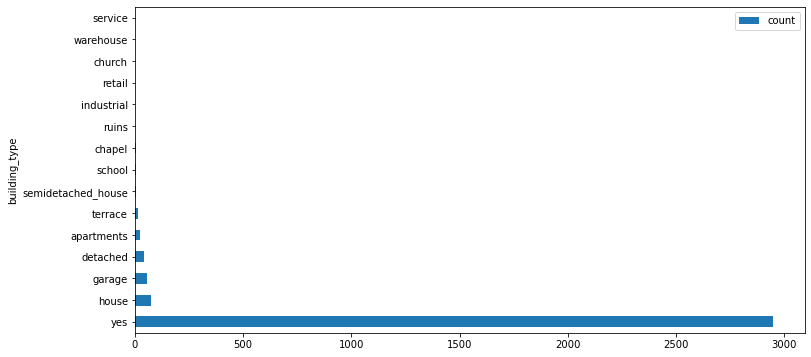

In [16]:
df_van_building_types.plot.barh(figsize=(12,6),
                                x='building_type')

In [17]:
df_van_building_types.drop([0]) 

,building_type,count
1,house,72
2,garage,55
3,detached,43
4,apartments,23
5,terrace,12
6,semidetached_house,6
7,school,5
8,chapel,3
9,ruins,2
10,industrial,2


<AxesSubplot:ylabel='building_type'>

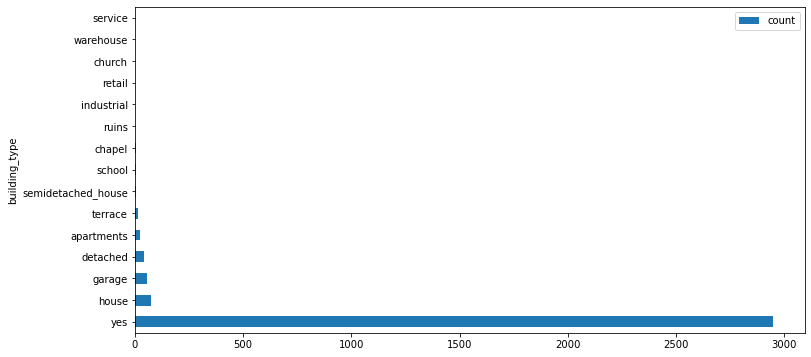

In [18]:
df_van_building_types.plot.barh(figsize=(12,6),
                                x='building_type')

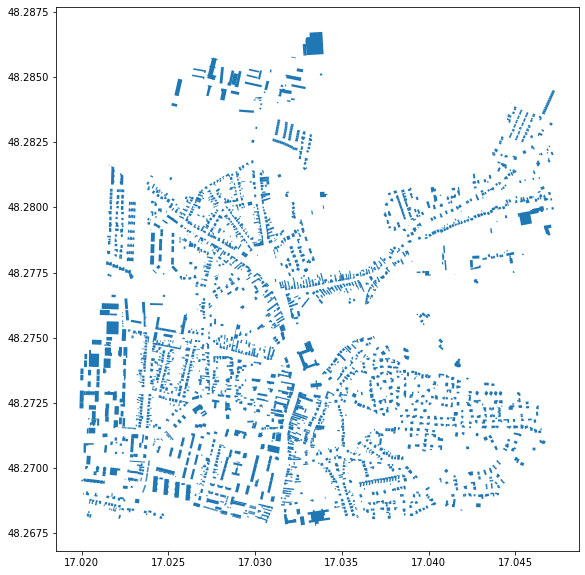

In [19]:
ax = van.plot(figsize=(10,10))

In [43]:
van_nodes_counts = van.nodes.value_counts()
van_nodes_counts

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[704317964, 704317946, 704318012, 1723440435, 704317973, 704318014, 704317964]                                                                                                                                                                                                                                                                                                                                                    1
[3625338338, 3625338336, 3625338294, 3625338295, 3625338338]                                                                                                                                                                                                                                                                                                                                                                      1
[3625338339, 3625338333, 3625338286, 3625338287, 3625338339]                                                                                                    